In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

# Exercise 2.1
## Exercise 2.1.1

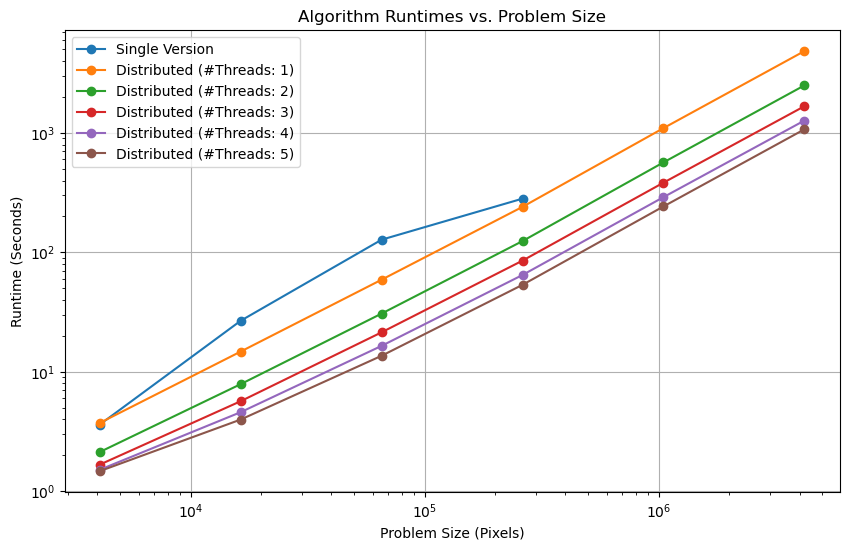

In [2]:
# Load the dataset
data = pd.read_csv('runtimes.csv', comment='#')

# Separate data for the single and distributed versions
single_version = data[data['algo'] == 'single']
distributed_version = data[data['algo'] == 'distributed']


plt.figure(figsize=(10, 6))

# Plot single version
plt.plot(single_version['size'], single_version['time'], marker='o', label='Single Version')

# Plot distributed versions for different numbers of threads
for threads in distributed_version['workers'].unique():
    subset = distributed_version[distributed_version['workers'] == threads]
    plt.plot(subset['size'], subset['time'], marker='o', label=f'Distributed (#Threads: {threads})')

# Logarithmic axis scaling for better visibility. -> Otherwise one can barely see what happens for small problem sizes
plt.xscale('log')
plt.yscale('log')

# Add labels and title
plt.xlabel('Problem Size (Pixels)')
plt.ylabel('Runtime (Seconds)')
plt.title('Algorithm Runtimes vs. Problem Size')
plt.legend()
plt.grid(True)

# Display the plot
plt.show()

## Exercise 2.1.2

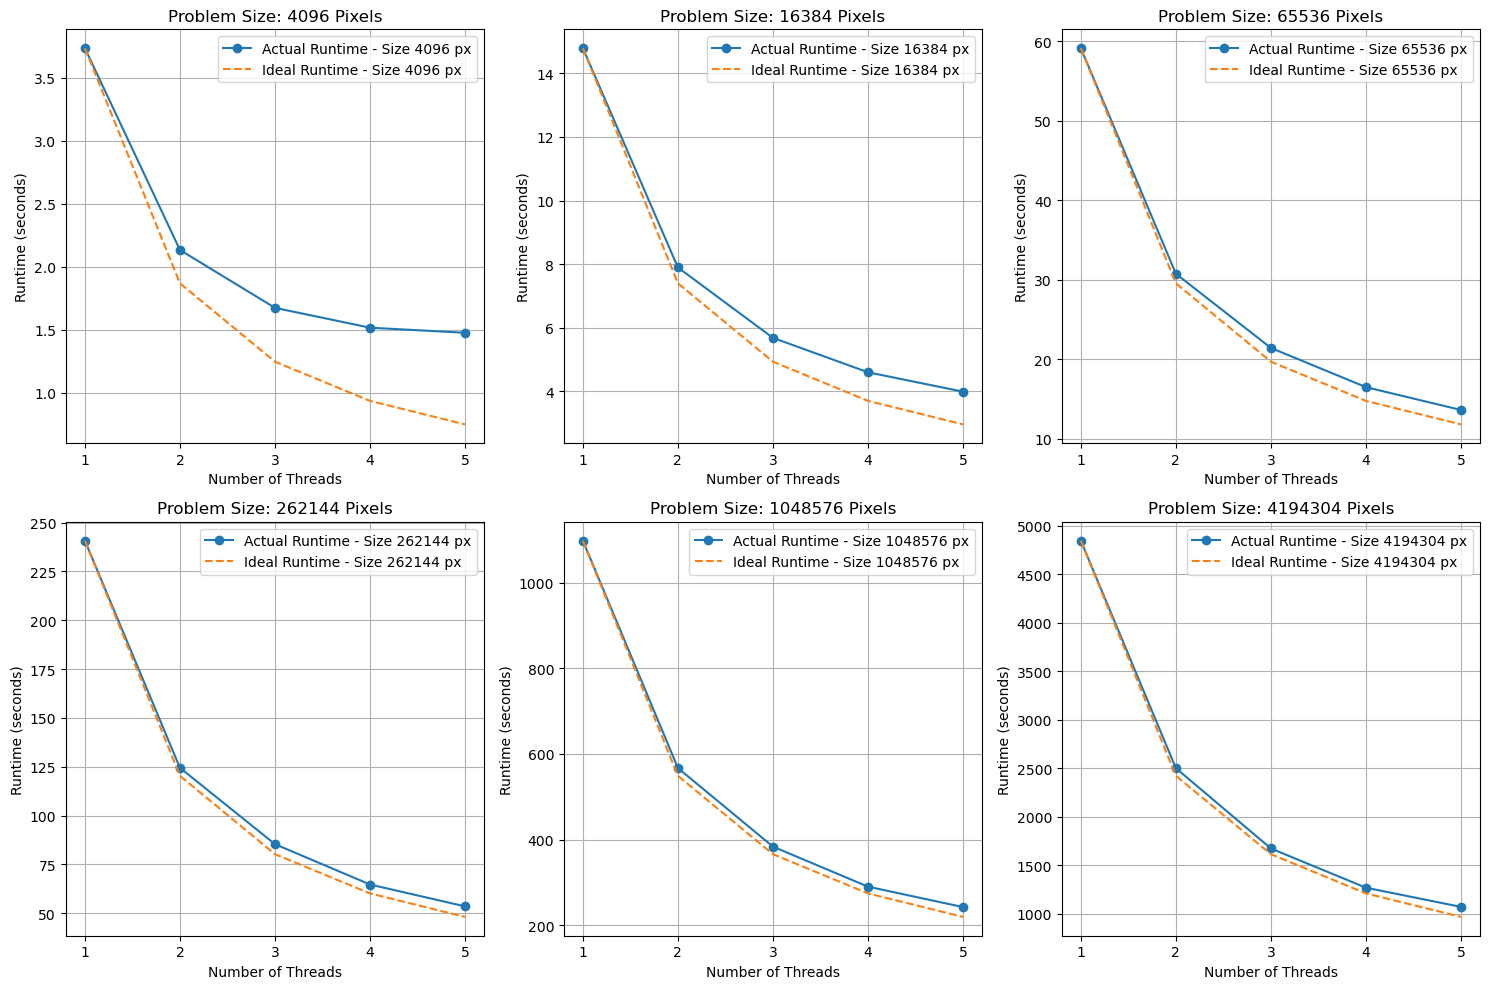

In [3]:
problem_sizes = sorted(distributed_version['size'].unique())

# (six different problem sizes in the dataset)
nrows = 2
ncols = 3

# Prepare the plot layout, ensuring enough subplots for all problem sizes
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 10))  # Adjusted figure size

# Flatten axes array for simpler iteration
axes = axes.flatten()


# Loop through each unique problem size
for ax, size in zip(axes, problem_sizes):
    subset = distributed_version[distributed_version['size'] == size].sort_values('workers')
    
    # Calculate ideal time based on the smallest number of workers. We expect an inverse proportional relation.
    base_time = subset[subset['workers'] == 1]['time'].iloc[0]
    ideal_time = base_time / subset['workers']
    
    # Plot actual and ideal runtimes
    ax.plot(subset['workers'], subset['time'], label=f'Actual Runtime - Size {size} px', marker='o')
    ax.plot(subset['workers'], ideal_time, label=f'Ideal Runtime - Size {size} px', linestyle='--')

    ax.set_title(f'Problem Size: {size} Pixels')
    ax.set_xlabel('Number of Threads')
    ax.set_ylabel('Runtime (seconds)')
    ax.set_xticks([1,2,3,4,5])
    ax.legend()
    ax.grid(True)

plt.tight_layout()
plt.show()

# Exercise 2.2

In [4]:
with open('zehn_min_rr_Beschreibung_Stationen.txt', 'r', encoding='latin-1') as file:
    lines = file.readlines()

# Extract headers and remove '\n'
headers = [headers.strip() for headers in lines[0].split(' ')] 
# print(headers)
# Creating empty list for reading lines and writing to CSV file later on.
data_collected = []

# Reading the data from the second row and storing it into given data.
for line in lines[2:]:
    rows = line.split(maxsplit = len(headers) -1)
    data_collected.append(rows)

#Write the collected data into the file.
import csv
with open('Stationen.csv', 'w') as writefile:
    writer = csv.writer(writefile)
    writer.writerow(headers)
    writer.writerows(data_collected)

# Read the csv file and get the dataframe:
df = pd.read_csv('Stationen.csv')
df

,Stations_id,von_datum,bis_datum,Stationshoehe,geoBreite,geoLaenge,Stationsname,Bundesland
0,20,20040812,20240422,432,48.9219,9.9129,Abtsgmünd-Untergröningen,Baden-Württemberg ...
1,44,20070208,20240422,44,52.9336,8.2370,Großenkneten,Niedersachsen ...
2,53,20050831,20240422,60,52.5850,13.5634,Ahrensfelde,Brandenburg ...
3,73,20070213,20240422,374,48.6183,13.0620,Aldersbach-Kramersepp,Bayern ...
4,78,20041010,20240422,64,52.4853,7.9125,Alfhausen,Niedersachsen ...
...,...,...,...,...,...,...,...,...
1063,19172,20200820,20240422,48,54.0246,9.3880,Wacken,Schleswig-Holstein ...
1064,19207,20230330,20240422,16,53.8178,12.0645,Gülzow-Prüzen,Mecklenburg-Vorpommern ...
1065,19299,20210322,20240422,463,49.8713,11.7883,Speichersdorf,Bayern ...
1066,19897,20231231,20240422,37,52.5040,13.4550,Berlin-Friedrichshain-Nord,Berlin ...


## Exercise 2.2.1

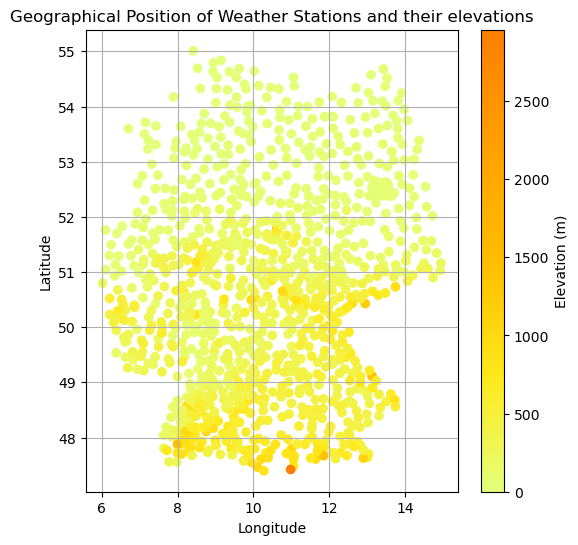

In [5]:
plt.figure(figsize=(6, 6))
plt.scatter(df['geoLaenge'], df['geoBreite'], c=df['Stationshoehe'], cmap='Wistia')
plt.colorbar(label='Elevation (m)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Geographical Position of Weather Stations and their elevations')
plt.grid(True)
plt.show()

## Exercise 2.2.2

In [6]:
precipitation_data = pd.read_csv('10min_processed.csv')
#precipitation_data

In [7]:
# Reformat the date
precipitation_data['date'] = pd.to_datetime(precipitation_data['date'], format='%Y%m%d%H%M')
#precipitation_data['date']

In [8]:
# Truncate missing values
precipitation_data['rain'] = precipitation_data['rain'].apply(lambda x: 0 if x == -999 else x)
#precipitation_data['rain']

In [9]:
# Add an extra column for the hour for easier use
precipitation_data['hour'] = precipitation_data['date'].dt.hour
#precipitation_data

In [10]:
# Create new dataframe containing hourly total rainfall per station
hourly_precipitation = precipitation_data.groupby(['stationid', 'hour'])['rain'].sum().reset_index()
# Rename id for merging the dataframe with the geographic information
hourly_precipitation.rename(columns={'stationid': 'Stations_id'}, inplace=True)
hourly_precipitation

,Stations_id,hour,rain
0,20,0,0.00
1,20,1,0.00
2,20,2,0.00
3,20,3,0.08
4,20,4,0.00
...,...,...,...
25165,19898,19,0.00
25166,19898,20,0.00
25167,19898,21,0.00
25168,19898,22,0.00


In [11]:
hourly_precipitation_with_coords = hourly_precipitation.merge(df[['Stations_id', 'geoBreite', 'geoLaenge']], how='left', on='Stations_id')
hourly_precipitation_with_coords

,Stations_id,hour,rain,geoBreite,geoLaenge
0,20,0,0.00,48.9219,9.9129
1,20,1,0.00,48.9219,9.9129
2,20,2,0.00,48.9219,9.9129
3,20,3,0.08,48.9219,9.9129
4,20,4,0.00,48.9219,9.9129
...,...,...,...,...,...
25165,19898,19,0.00,52.4970,13.2820
25166,19898,20,0.00,52.4970,13.2820
25167,19898,21,0.00,52.4970,13.2820
25168,19898,22,0.00,52.4970,13.2820


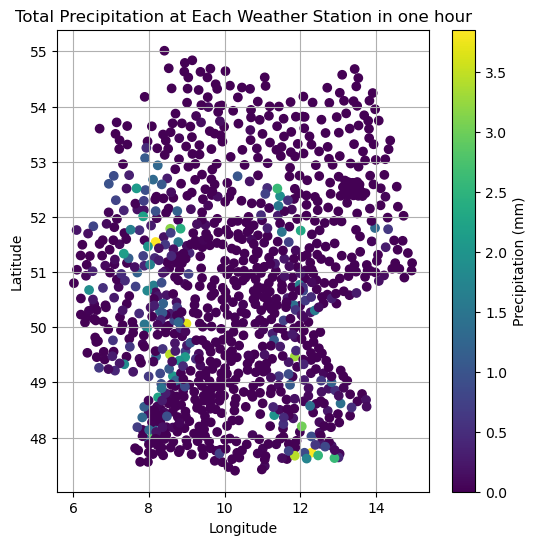

In [12]:
chosen_hour = 14
hour_data = hourly_precipitation_with_coords[hourly_precipitation['hour'] == chosen_hour]


# Scatter plot based on geographic position. Precipitation is only shown via the color channel. This makes it easy to observe patterns, which is not.
plt.figure(figsize=(6, 6))
plt.scatter(hour_data['geoLaenge'], hour_data['geoBreite'], c=hour_data['rain'], cmap='viridis')

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Total Precipitation at Each Weather Station in one hour')
plt.colorbar(label='Precipitation (mm)')
plt.grid(True)
plt.show()

## Exercise 2.1.3

In [34]:
grid_data = np.load('griddata.npz')
geolat = grid_data['geolat']
geolong = grid_data['geolong']
ind = grid_data['ind']

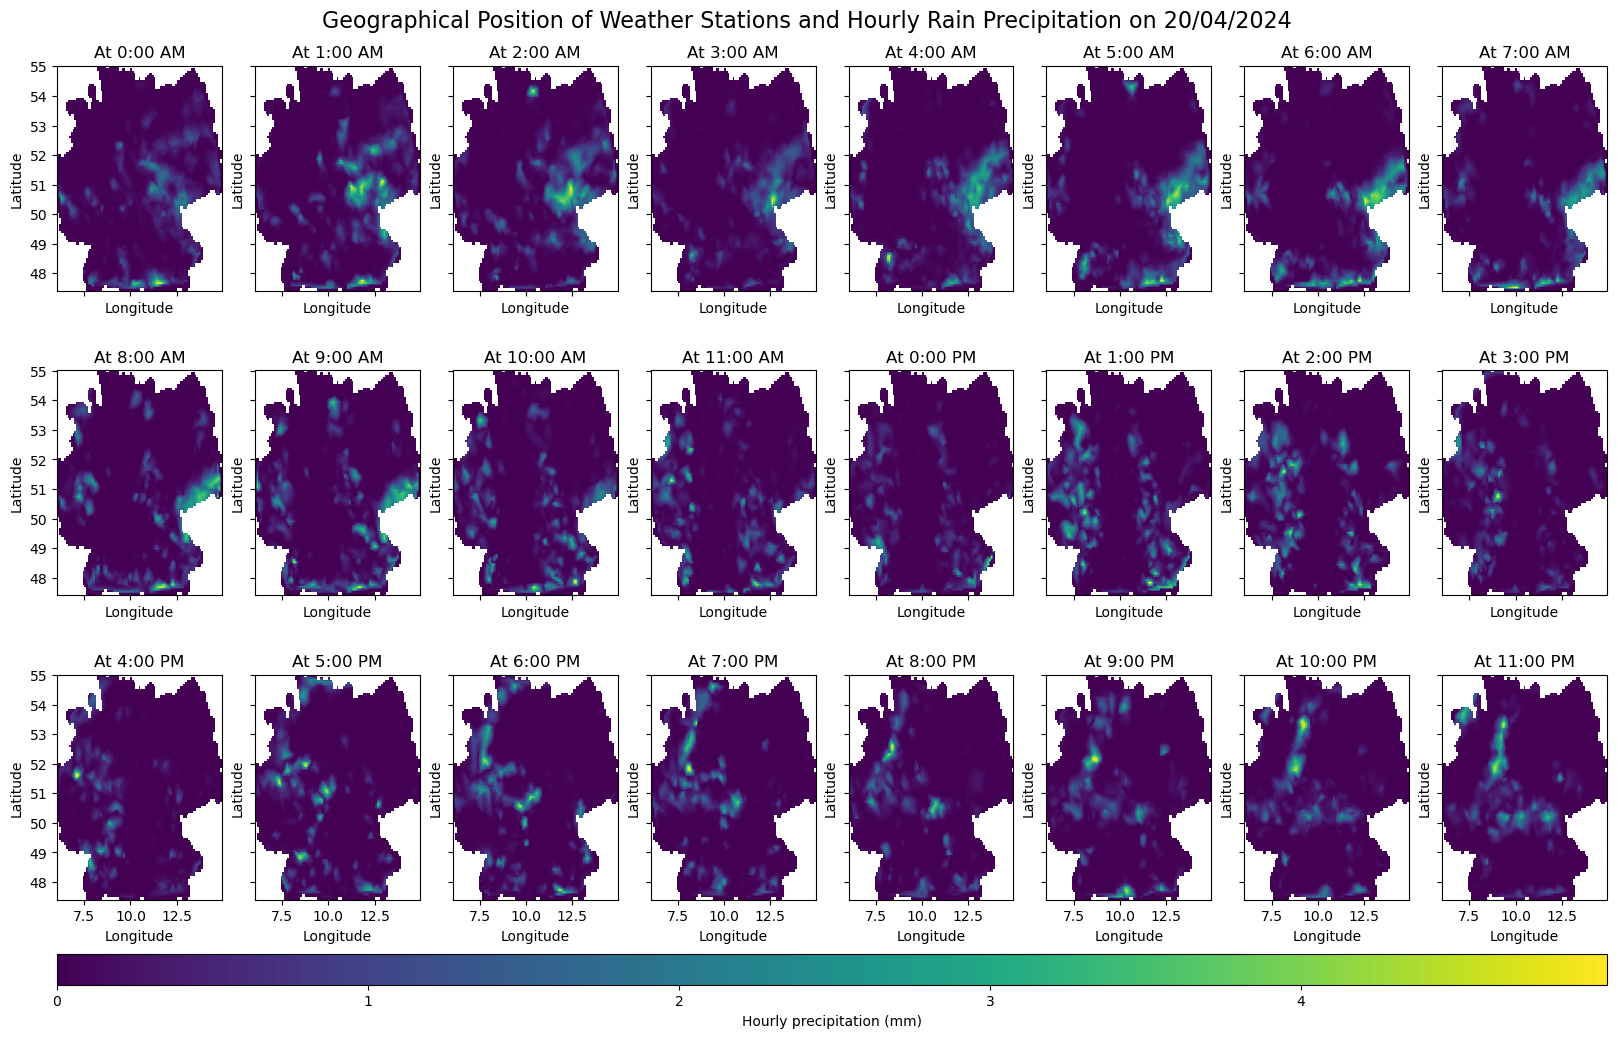

In [49]:
from scipy.interpolate import griddata
# create subplots with 3 rows and 8 columns for all 24 hours, increase figsize and reduce spacing
fig, axs = plt.subplots(nrows=3, ncols=8, figsize=(20,14), sharex=True, sharey=True)#, gridspec_kw={'hspace': 0.2, 'wspace': 0.15})

# Plot interpolated precipitation data for each hour
for hour in range(24):
    ax = axs.flatten()[hour]
    
    # get the rain for each hour
    hourly_data = hourly_precipitation_with_coords[hourly_precipitation_with_coords['hour'] == hour]

    hourly_data = hourly_data.dropna()

    
    # Interpolate precipitation data to the grid
    interpolated_rain = griddata((hourly_data['geoLaenge'], hourly_data['geoBreite']), hourly_data['rain'], (geolong, geolat), method='linear', fill_value=0)    
    
    # Mask out regions where 'ind' is False as it is not part of the map
    interpolated_rain = np.ma.masked_where(~ind, interpolated_rain)
    
    # Plot the image
    im = ax.imshow(interpolated_rain, extent=(geolong.min(), geolong.max(), geolat.min(), geolat.max()), origin = 'lower', aspect='auto')
    ax.set_title(f'At {(str(hour) + ":00 AM") if hour < 12 else (str(hour - 12) + ":00 PM")}')
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')
    ax.set_aspect(1.6)  # To make the aspect ratio more realistic  

# Add overall title and adjust the position
fig.suptitle('Geographical Position of Weather Stations and Hourly Rain Precipitation on 20/04/2024', fontsize=16, y=0.9)

# Add colorbar
plt.colorbar(im, ax=axs, orientation='horizontal', label='Hourly precipitation (mm)', aspect=50, pad=0.05)

# Adjust layout
plt.show()